In [1]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms with Python"
# by
# Chanchal Chatterjee
# December 2021
#
# Experiments for Chapter 7 - Generalized Principal and Minor Eigenvectors of a Matrix Sequence
# OJA - Adaptive SVD 
#
# Author: Chanchal Chatterjee
#

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [3]:
# Number of samples N and dimension D
nSamples = 1000
nDim1 = 3
nDim2 = 5
np.random.seed(1)


In [4]:
# Generate the X random vectors
X = np.zeros(shape=(nDim1, nSamples))
for i in range(nSamples):
    for j in range(nDim1):
        X[j,i] = (20-2*j) * np.random.normal(0, 1)
meanX = np.mean(X, axis=1).reshape(nDim1,1)
X = X - meanX


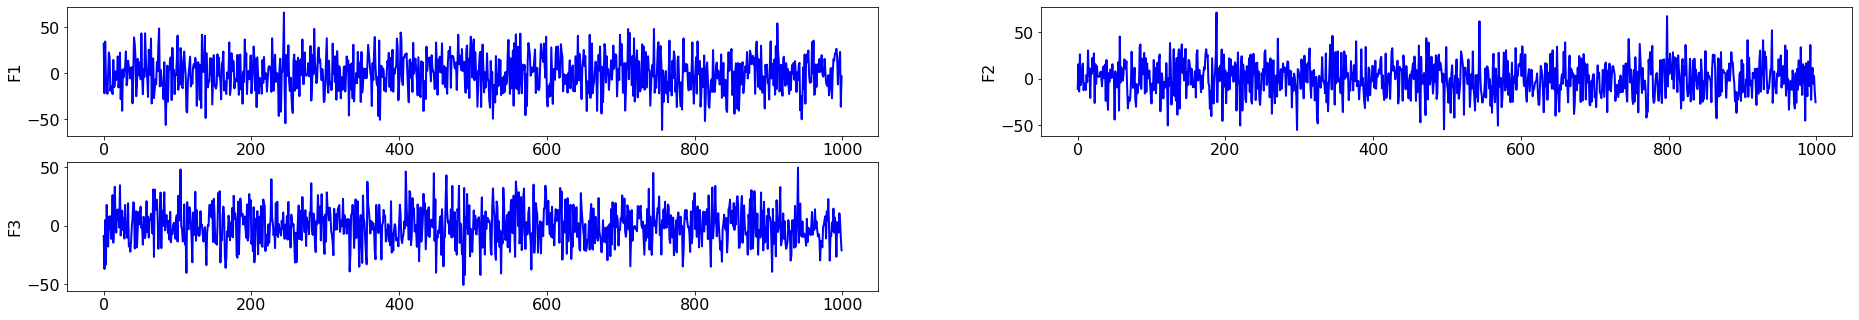

In [5]:
# Plot the X data
dataset = pd.DataFrame(X.T, columns=['F1','F2','F3'])
plt.figure(figsize=(32, 48))
plt.rcParams.update({'font.size': 16})
cols = dataset.columns
for i in range(dataset.shape[1]):
    plt.subplot(17, 2, i+1)
    plt.ylabel(cols[i])
    plt.plot(dataset[cols[i]], lw=2, color='b')
plt.show()

In [6]:
# Generate the Y random vectors
Y = np.zeros(shape=(nDim2, nSamples))
for i in range(nSamples):
    for j in range(nDim2):
        Y[j,i] = 3 * np.random.normal(0, 1)
meanY = np.mean(Y, axis=1).reshape(nDim2,1)
Y = Y - meanY


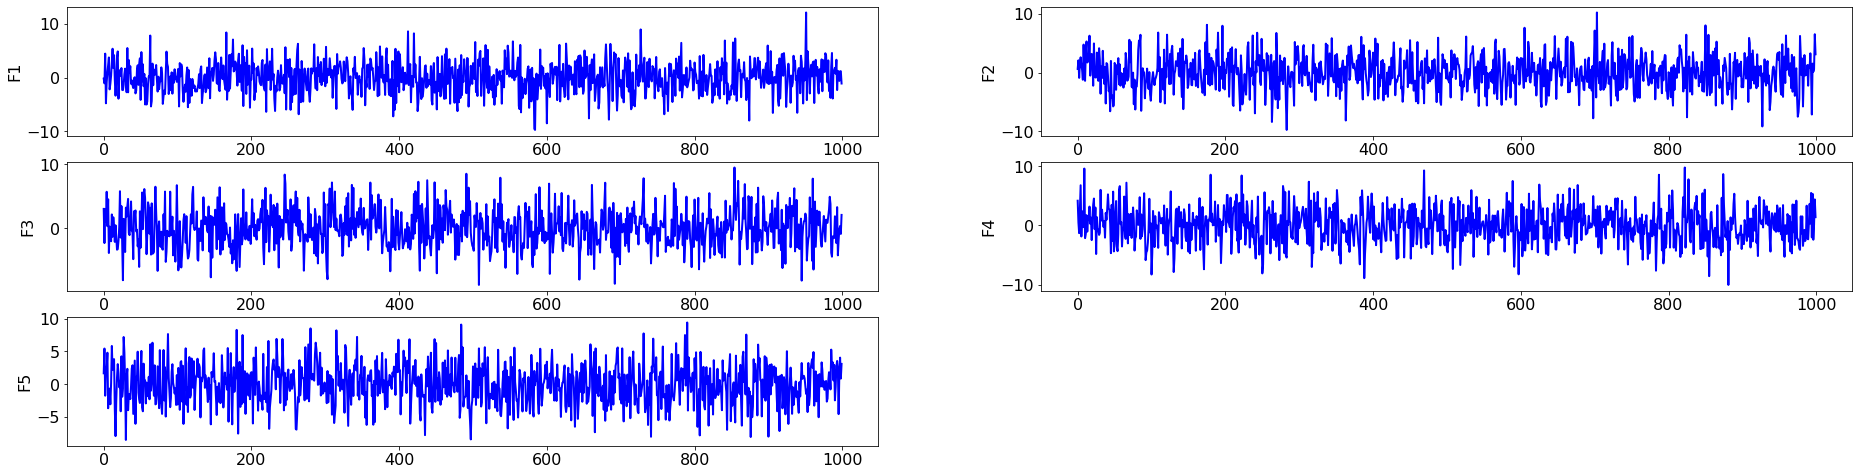

In [7]:
# Plot the Y data
dataset = pd.DataFrame(Y.T, columns=['F1','F2','F3','F4','F5'])
plt.figure(figsize=(32, 48))
plt.rcParams.update({'font.size': 16})
cols = dataset.columns
for i in range(dataset.shape[1]):
    plt.subplot(17, 2, i+1)
    plt.ylabel(cols[i])
    plt.plot(dataset[cols[i]], lw=2, color='b')
plt.show()

In [8]:
# Generate the C matrix
C = np.zeros(shape=(nDim1,nDim2))
for i in range(nSamples):
    x = X[:,i].reshape(nDim1,1)
    y = Y[:,i].reshape(nDim2,1)
    C = C + np.dot(x, y.T) / nSamples
C


array([[ 1.45504762, -1.33830737, -0.55102475,  1.36365858,  0.46353247],
       [ 1.27332201,  1.67429576, -0.65975576,  1.18586305, -0.72959084],
       [-0.60250171, -0.49755758, -2.2815324 , -2.55676811, -0.09368045]])

In [9]:
# Compute the true eigenvectors and eigenvalues
from numpy import linalg as la
[U,D,VT] = np.linalg.svd(C)
print(D)
# from numpy import linalg as la
for i in range(nDim1):
    U[:,i] = U[:,i]/la.norm(U[:,i])
for i in range(nDim2):
    VT[:,i] = VT[:,i]/la.norm(VT[:,i])


[3.82611302 2.35488949 2.29388496]


In [10]:
# Recreate C from UDVT
# create m x n D matrix
D1 = np.zeros(shape=(nDim1, nDim2))
# populate D with n x n diagonal matrix
D1[:nDim1, :nDim1] = np.diag(D)
U @ D1 @ VT


array([[ 1.45504762, -1.33830737, -0.55102475,  1.36365858,  0.46353247],
       [ 1.27332201,  1.67429576, -0.65975576,  1.18586305, -0.72959084],
       [-0.60250171, -0.49755758, -2.2815324 , -2.55676811, -0.09368045]])

In [11]:
from scipy.linalg import eigh
from sklearn.preprocessing import normalize

# Compute A = [0 C;CT 0]
Z1 = np.zeros(shape=(nDim1,nDim1))
Z2 = np.zeros(shape=(nDim2,nDim2))
A  = np.block([[Z1, C], [C.T, Z2]])

# Compute Eigenvectors of A
eigvalsA, eigvecsA = eigh(A)
Phi = np.fliplr(eigvecsA)
print("eigvals A=\n", eigvalsA[::-1])

# Find the U and V blocks
U1 = Phi[0:nDim1,0:nDim1]
U1 = normalize(U1, axis=0, norm='l2')
V1 = Phi[nDim1:nDim1+nDim2, 0:2]
V1 = np.sqrt(2) * Phi[nDim1:nDim1+nDim2, 0:2]
Ut = U
Vt = VT.T[:,[0,1]]

print("U True     = \n", Ut)
print("U Computed = \n", U1)
print("V True     = \n", Vt)
print("U Computed = \n", V1)
print("U_True * U_Computed = \n", Ut.T @ U1)
print("V_True * V_Computed = \n", Vt.T @ V1)


eigvals A=
 [ 3.82611302e+00  2.35488949e+00  2.29388496e+00  0.00000000e+00
 -2.19562585e-16 -2.29388496e+00 -2.35488949e+00 -3.82611302e+00]
U True     = 
 [[-0.31573527  0.5620015  -0.76450347]
 [-0.38825277  0.65865783  0.64453832]
 [ 0.8657777   0.50032407  0.01023713]]
U Computed = 
 [[ 0.31573527  0.5620015  -0.76450347]
 [ 0.38825277  0.65865783  0.64453832]
 [-0.8657777   0.50032407  0.01023713]]
V True     = 
 [[-0.38561673  0.57538851]
 [-0.17204755  0.04319406]
 [-0.40384848 -0.80077457]
 [-0.81141423  0.11390918]
 [ 0.01458547 -0.11334518]]
U Computed = 
 [[ 0.38561673  0.57538851]
 [ 0.17204755  0.04319406]
 [ 0.40384848 -0.80077457]
 [ 0.81141423  0.11390918]
 [-0.01458547 -0.11334518]]
U_True * U_Computed = 
 [[-1.00000000e+00 -4.08661809e-16  1.14867178e-15]
 [-4.49785231e-16  1.00000000e+00  9.15566262e-15]
 [ 1.28723553e-15 -1.22904421e-14  1.00000000e+00]]
V_True * V_Computed = 
 [[-1.00000000e+00 -6.82061984e-16]
 [-2.54174859e-16  1.00000000e+00]]


In [18]:
# Run the adaptive algorithm
from numpy import linalg as la
from sklearn.preprocessing import normalize
nEpochs = 3
nEA = 2 # Number of components computed adaptively
C1 = np.zeros(shape=(nDim1,nDim2))
A  = np.zeros(shape=(nDim1+nDim2,nDim1+nDim2))
W  = 0.1 * np.ones(shape=(nDim1+nDim2,nEA))
cos_t1 = np.zeros(shape=(nDim1, nSamples*nEpochs)) # cosine error
cos_t2 = np.zeros(shape=(nDim2, nSamples*nEpochs)) # cosine error

for epoch in range(nEpochs):
    for iter in range(nSamples//1):
        cnt = nSamples*epoch + iter
        x = X[:,iter]
        x = x.reshape(nDim1,1)
        y = Y[:,iter]
        y = y.reshape(nDim2,1)
        C1 = C1 + (1.0/(1 + cnt))*((np.dot(x, y.T)) - C1)
        A = np.block([[Z1, C1], [C1.T, Z2]])
        W = W + (1.0 / (500 + cnt)) * (A @ W - 0.5 * W @ np.triu(W.T @ A @ W) - \
                                       0.5 * A @ W @ np.triu(W.T @ W))
      
        U1 = W[0:nDim1,0:nDim1]
        U1 = normalize(U1, axis=0, norm='l2')
        V1 = W[nDim1:nDim1+nDim2, 0:nEA]
        V1 = normalize(V1, axis=0, norm='l2')

        for i in range(nEA):
            ui = U1[:,i]
            ui = ui.reshape(nDim1,1)
            ut = U[:,i].reshape(nDim1,1)
            cos_t1[i,cnt] = abs(ui.T @ ut)

            vi = V1[:,i]
            vi = vi.reshape(nDim2,1)
            vt = VT.T[:,i].reshape(nDim2,1)
            cos_t2[i,cnt] = abs(vi.T @ vt)


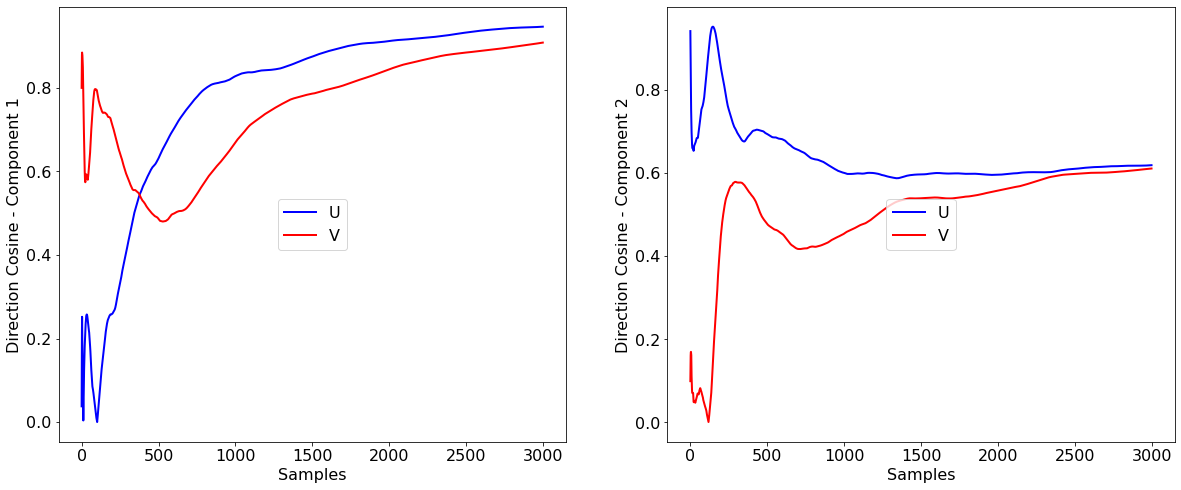

In [19]:
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 16})

plt.subplot(1, 2, 1)
plt.plot(cos_t1[0,:], lw=2, color='b', label='U')
plt.plot(cos_t2[0,:], lw=2, color='r', label='V')
plt.ylabel('Direction Cosine - Component 1')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(1, 2, 2)
plt.plot(cos_t1[1,:], lw=2, color='b', label='U')
plt.plot(cos_t2[1,:], lw=2, color='r', label='V')
plt.ylabel('Direction Cosine - Component 2')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.show()